<a href="https://colab.research.google.com/github/DhaneshTikoo/FacialDataProject/blob/main/FacialDataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Intro about what this is and how to use it

#File Locations


In your Google Drive, make a folder called "Facial Data"

Place all the Facial Data files in your Google Drive. Make sure they are in the folder you just created.

If you want to place the files somewhere else, you can modify the file paths below.

In [95]:
# setting default file paths
myPath = '/content/drive/MyDrive/Facial Data'
outputPath = myPath + '/output'

#Start

Now, press the "Runtime" button and click "Run All"
If Google gives you warnings, click "Run anyways."
Additionally, you will need to connect your Google Drive to Google Colab, so make sure to sign in to Google when prompted to mount your Google Drive.

#Setup

##Imports

In [96]:
# importing needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from operator import itemgetter
import os

In [97]:
# if mpld3 is not already installed, install it
installedPackages = !pip list -v
installed = False
for package in installedPackages:
  if package[0:5] == 'mpld3':
    installed = True
if installed == False:
  !pip install mpld3

# import mpld3
import mpld3

##Setup Functions

In [98]:
def importData(myfile, myPath):
  """
  imports the data from the file to a dataframe
  myFile: string
    the name of the text file where the data is located, including the filetype suffix
  myPath: string
    the path where the file is stored

  returns:
    imported dataframe
  """
  pathFull = myPath + "/" + myfile
  data = pd.read_csv(pathFull, header = None, skiprows=22)
  data.columns = my_cols
  return data

In [99]:
def derivative(x,y):
  """
  inputs x and y lists and returns the x and y lists for that graph's derivative:
  reduces the length of x by 1 and takes the derivative of y
  x: list, array
  y: list, array
    the x and y lists for a graph

  returns:
    the modified x and y lists
  """
  dydx = np.diff(y)/np.diff(x)
  dydx_x = x[:-1]
  return dydx_x, dydx

In [100]:
def generateDerivativeFrames(df):
  """
  creates dataframes for the derivatives of a dataframe's columns
  data: dataframe
    the name of the text file where the data is located, including the filetype suffix

  returns:
    der1: the first derivative of the columns of data
    der2: the second derivative of the columns of data
  """
  der1 = pd.DataFrame()
  der2 = pd.DataFrame()

  # create derivative 1
  der1 = pd.concat([der1, df["bs"][:-1]], axis=1)
  der1 = pd.concat([der1, df[Milliseconds][:-1]], axis=1)
  for col in df.columns[2:]:
    column = df[col]
    x = []
    x, column_der = derivative(df[Milliseconds], column)
    column_der = pd.Series(column_der)
    der1 = pd.concat([der1, column_der.rename(col)], axis=1)

  # create derivative 2
  der2 = pd.concat([der2, df["bs"][:-2]], axis=1)
  der2 = pd.concat([der2, df[Milliseconds][:-2]], axis=1)
  for col in der1.columns[2:]:
    column = der1[col]
    x = []
    x, column_der2 = derivative(der1[Milliseconds], column)
    column_der2 = pd.Series(column_der2)
    der2 = pd.concat([der2, column_der2.rename(col)], axis=1)

  return der1, der2

In [101]:
def saveGraph(fig, name):
  fileName = f'{outputPath}/{name}.png'
  fig.savefig(fileName)

##Mount Drive & Make Output Directory

In [102]:
# mount drive
if not os.path.isdir(os.path.join('/content/drive', 'My Drive')):
  from google.colab import drive
  drive.mount('/content/drive')

# make output dir
if not os.path.exists(outputPath):
  os.mkdir(outputPath)

##Establish Variables

In [103]:
# creating a default dataframe
data = pd.DataFrame()

In [104]:
# setting column titles to correspond to the blendshapes they represent
my_cols = ['bs', 'Milliseconds', 'head x', 'head y', 'head z', 'EA x', 'EA y',
       'EA z', 'LE x', 'LE y', 'RE x', 'RE y', 'browInnerUp', 'browDown_L',
       'browDown_R', 'browOuterUp_L', 'browOuterUp_R', 'eyeLookUp_L',
       'eyeLookUp_R', 'eyeLookDown_L', 'eyeLookDown_R', 'eyeLookIn_L',
       'eyeLookIn_R', 'eyeLookOut_L', 'eyeLookOut_R', 'eyeBlink_L',
       'eyeBlink_R', 'eyeSquint_L', 'eyeSquint_R', 'eyeWide_L', 'eyeWide_R',
       'cheekPuff', 'cheekSquint_L', 'cheekSquint_R', 'noseSneer_L',
       'noseSneer_R', 'jawOpen', 'jawForward', 'jawLeft', 'jawRight',
       'mouthFunnel', 'mouthPucker', 'mouthLeft', 'mouthRight',
       'mouthRollUpper', 'mouthRollLower', 'mouthShrugUpper',
       'mouthShrugLower', 'mouthClose', 'mouthSmile_L', 'mouthSmile_R',
       'mouthFrown_L', 'mouthFrown_R', 'mouthDimple_L', 'mouthDimple_R',
       'mouthUpperUp_L', 'mouthUpperUp_R', 'mouthLowerDown_L',
       'mouthLowerDown_R', 'mouthPress_L', 'mouthPress_R', 'mouthStretch_L',
       'mouthStretch_R', 'tongueOut']

In [105]:
# defining pairs of columns
colPairs = {
  'EulerAngles': ['EA x', 'EA y'],
  'EyeX':['LE x', 'RE x'],
  'EyeY': ['LE y', 'RE y'],
  'browDown':['browDown_L', 'browDown_R'],
  'browOuterUp':['browOuterUp_L', 'browOuterUp_R'],
  'eyeLookUp':['eyeLookUp_L', 'eyeLookUp_R'],
  'eyeLookDown':['eyeLookDown_L', 'eyeLookDown_R'],
  'eyeLookIn':['eyeLookIn_L', 'eyeLookIn_R'],
  'eyeLookOut':['eyeLookOut_L', 'eyeLookOut_R'],
  'eyeBlink':['eyeBlink_L', 'eyeBlink_R'], 
  'eyeSquint':['eyeSquint_L', 'eyeSquint_R'], 
  'eyeWide':['eyeWide_L', 'eyeWide_R'],
  'cheekSquint':['cheekSquint_L', 'cheekSquint_R'], 
  'noseSneer':['noseSneer_L', 'noseSneer_R'], 
  'jaw':['jawLeft', 'jawRight'],
  'mouth':['mouthLeft', 'mouthRight'],
  'mouthRoll':['mouthRollUpper', 'mouthRollLower'] ,
  'mouthShrug':['mouthShrugUpper',  'mouthShrugLower'], 
  'mouthSmile':['mouthSmile_L', 'mouthSmile_R'],
  'mouthFrown':['mouthFrown_L', 'mouthFrown_R'], 
  'mouthDimple':['mouthDimple_L', 'mouthDimple_R'],
  'mouthUpper':['mouthUpperUp_L', 'mouthUpperUp_R'],
  'mouthLower':['mouthLowerDown_L','mouthLowerDown_R'], 
  'mouthPress':['mouthPress_L', 'mouthPress_R'], 
  'mouthStretch':['mouthStretch_L','mouthStretch_R']
}

In [106]:
# defines Milliseconds as the string of the millisecond column
Milliseconds = my_cols[1]

##Read in Data

In [107]:
#importing the data tables to dataframes
dfs = []
dfsNames = []
dfs_vel = []
dfs_accel = []
i=0

for filename in os.listdir(myPath):
    if filename.endswith("txt"): 
        dfs.append(importData(filename, myPath))
        dfsNames.append(filename[:-4])
        tempData1, tempData2 = generateDerivativeFrames(dfs[i])
        dfs_vel.append(tempData1)
        dfs_vel.append(tempData2)
        i+=1

#Graphing & Analysis

##Graph Column or ColPair Section (FINAL)

In [108]:
def GraphColumnsSection(colTitles = [], df = data, xstart = 0, xend = None, together = False):
  """
  graphs the given columns from the given dataframe, with a restricted x axis
  colTitles: list, array
    a list or array of all names of columns which will be graphed
  df: dataframe
    the dataframe that the columns will be from
  together: boolean
    Whether or not the graphs will be overlayed or not
  xstart: integer
    The lowest value for the x axis
  xend: integer
    The highest value for the x axis
  """
  # if xend is not input
  if xend == None:
    # set the maximum x value to the highest it can be with the given dataframe
    xend = max(df[Milliseconds])
  # if together is True, graph both graphs on the same axis
  if together:
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    for colTitle in colTitles:
      ax.plot(df[Milliseconds], df[colTitle], label = colTitle)
      ax.legend()
      ax.set_xlim(xstart, xend)
  # otherwise, graph them on different axes
  else:
    fig, ax = plt.subplots(len(colTitles), 1, figsize = (8, 6*len(colTitles)))
    for i in range(len(colTitles)):
      ax[i].plot(df[Milliseconds], df[colTitles[i]], label = colTitles[i])
      ax[i].legend()
      ax[i].set_xlim(xstart, xend)

In [109]:
def GraphColPairsSection(pairs = [], df = data, xstart = 0, xend = None):
  """
  graphs the given column pairs from the given dataframe, with a restricted x axis
  pairs: list, array
    a list or array of all names of column pairs which will be graphed
  df: dataframe
    the dataframe that the columns will be from
  xstart: integer
    The lowest value for the x axis
  xend: integer
    The highest value for the x axis
  """
  # if xend is not input
  if xend == None:
    # set the maximum x value to the highest it can be with the given dataframe
    xend = max(df[Milliseconds])
  # create figure and axis
  fig, ax = plt.subplots(1, 1, figsize = (8, 6))
  # graph each pair with the restricted x axis
  for pairName in pairs:
    colPairs[pairName][0]
    ax.plot(df[Milliseconds], df[colPairs[pairName][0]], label = colPairs[pairName][0])
    ax.plot(df[Milliseconds], df[colPairs[pairName][1]], label = colPairs[pairName][1])
    ax.legend()
    ax.set_xlim(xstart, xend)

##Graph All (FINAL)

In [110]:
def graphAll(dfs = [], titles = [], skinnyGraph = True, scaled = False):
  """
  graphs all of the columns for each of the given dataframes
  the format of the graph depends on the 'skinnyGraph' variable
  dfs: list
    the list of dataframes which will have thier columns graphed
  titles: list
    the list of titles corresponding to the dataframes
    the first element of titles will be used to label the first element of dfs, etc.
  skinnyGraph: boolean
    if True, each dataframe will occupy only one column
    if False, the graphs will still be next to each other, but will occupy multiple columns
  scaled: boolean
    if True, the y axis will go from 0 to 1

  returns:
    the graph of all the columns of each dataframe
  """
  # calculates graph size based on the amount of dataframes input
  if skinnyGraph == True:
    totalRows = len(dfs[0].columns)-2
    totalColumns = len(dfs)
    figsize=(8*totalColumns, 6*totalRows)
  else:
    totalGraphsNum = len(dfs)*(len(dfs[0].columns)-2)
    totalRows = math.floor(math.sqrt(totalGraphsNum))
    totalColumns = math.ceil(totalGraphsNum/totalRows)
    while totalColumns % len(dfs) != 0:
      totalColumns+=1
    figsize=(8*totalColumns, 6*totalRows)

  # create the figure and axis
  fig, ax = plt.subplots(totalRows, totalColumns, figsize = figsize)
  # if scaled is true, limit the y axis
  if scaled == True:
    plt.setp(ax, ylim = (0, 1))
  # create the graph and save it to a file
  row = 0
  column = 0
  colTitles = dfs[0].columns[2:]
  # if there is more than one column, create the graph via this logic
  if totalColumns > 1:
    for col in colTitles:
      for i in range(0, len(dfs)):
        x=dfs[i][Milliseconds]
        y=dfs[i][col]

        ax[row, column+i].plot(x,y, label=col)
        ax[row, column+i].set_title(f'{titles[i]}')
        ax[row, column+i].legend()
      row+=1
      if row%totalRows==0:
        row = 0
        column+=len(dfs)
  # otherwise, use this logic
  else:
    for col in colTitles:
      x=dfs[0][Milliseconds]
      y=dfs[0][col]

      ax[row].plot(x,y, label=col)
      ax[row].set_title(f'{titles[0]}')
      ax[row].legend()
      row+=1

  return fig

In [111]:
def graphAllToFile(dfs = [], titles = [], skinnyGraph = True, scaled = False):
  """
  graphs all of the columns for each of the given dataframes and outputs them to a file
  the format of the graph depends on the 'skinnyGraph' variable
  dfs: list
    the list of dataframes which will have thier columns graphed
  titles: list
    the list of titles corresponding to the dataframes
    the first element of titles will be used to label the first element of dfs, etc.
  skinnyGraph: boolean
    if True, each dataframe will occupy only one column
    if False, the graphs will still be next to each other, but will occupy multiple columns
  scaled: boolean
    if True, the y axis will go from 0 to 1
  """
  fig = graphAll(dfs,titles)
  nametotal = ""
  for index in range(len(titles)):
    nametotal = nametotal + titles[index] + "-"
  saveGraph(fig, f"{nametotal}All Graphs")

##Fourier Transform Functions (FINAL)

In [112]:
def compareFourierTransforms(dfs = [], titles = [], skinnyGraph = True):
  """
  outputs graphs of the fourier transforms of each column in the input dataframes
  dfs: list
    the list of dataframes that will have their columns' fourier transforms compared
  titles: list
    the names of the corresponding output columns
    the 1st name will be attached to the first dataframe, and so on
  skinnyGraph: boolean
    If true, the graph will have as many columns as dataframes input
    If false, the graph will instead be more square-shaped
  returns:
    a graph with the fourier transforms for each column in the given dataframes
  """
  # seting graph sizes
  if skinnyGraph == True:
    totalRows = len(my_cols[12:])
    totalColumns = len(dfs)
    figsize=(8*totalColumns, 6*totalRows)
  else:
    totalGraphsNum = len(dfs)*len(my_cols[12:])
    totalRows = math.floor(math.sqrt(totalGraphsNum))
    totalColumns = math.ceil(totalGraphsNum/totalRows)
    while totalColumns % len(dfs) != 0:
       totalColumns+=1
    figsize=(8*totalColumns, 6*totalRows)

  fig, ax = plt.subplots(totalRows, totalColumns, figsize = figsize)

  # creating the fourier transforms at their appropriate location in the graph
  for i in range(len(dfs)):
    for j in range(len(my_cols[12:])):
      FFT = np.fft.fft(dfs[i][my_cols[j+12]])
      freq = np.arange(len(dfs[i][Milliseconds]))/dfs[i][Milliseconds][len(dfs[i][Milliseconds])-1] # scale by dividing by max time
      ax[j][i].plot(freq,np.abs(FFT))
      ax[j][i].set_title(f"{titles[i]}, {my_cols[j+12]}")

  return fig

In [113]:
def fourierTransform(df = data):
  """
  displays all graphs for the fourier transforms in a given dataframe
  data: dataframe
    the dataframe that has columns that will be input into the fourier transform
  returns:
    multiple graphs, each of a column that has been input into the fourier transform
  """
  for col in my_cols[2:]:
    SecondsfromNano = df[Milliseconds]/1000
    
    FFT = np.fft.fft(df[col])
    freq = np.arange(len(SecondsfromNano))/SecondsfromNano[len(SecondsfromNano)-1] # scale by dividing by max time
    fig, ax = plt.subplots(1,1, figsize = (10,8))
    ax.set_xlim(0, 30)
    ax.plot(freq,np.abs(FFT))
    ax.set_title(col)

In [114]:
def fourierTransformInterval(df = data, col = "LE x", startinit = 0, endinit = 10000, xlim = (0, 30), ylim = None):
  """
  performs a fourier transform on a certain interval for a specific column in a specific dataframe
  df: dataframe
    the dataframe input
  col: string
    the name of the column to be input
  startinit: integer
    the lower bound for the fourier transform
  endinit: integer
    the higher bound for the fourier transform
  xlim: tuple
    the bounds for the x-axis
  ylim: tuple
    the bounds for the y-axis
    If not input, the y axis will be automatically assigned
  """
  start = findInDf(startinit, df)
  end = findInDf(endinit, df)

  SecondsfromNano = df[Milliseconds][start:end]/1000

  FFT = np.fft.fft(df[col][start:end])
  freq = np.arange(len(SecondsfromNano))/(SecondsfromNano[end-1]-SecondsfromNano[start]) # scale by dividing by max time
  fig, ax = plt.subplots(1,1, figsize = (10,8))
  ax.set_xlim(xlim)
  if ylim != None:
    ax.set_ylim(ylim)
  ax.plot(freq,np.abs(FFT))
  ax.set_title(col)
  plt.show()

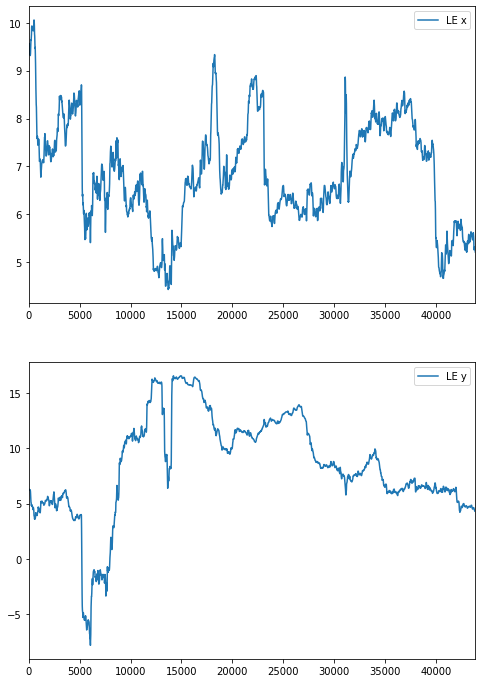

In [115]:
GraphColumnsSection(["LE x", "LE y"], dfs[0])

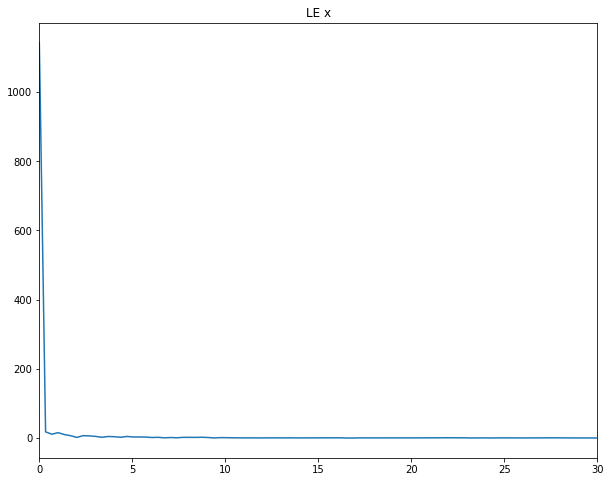

In [116]:
fourierTransformInterval(dfs[0], "LE x", 28000, 31000)

In [117]:
def fourierTransformAutoInterval(df = data, col = "LE x", interval = 1000, xlim = (0, 30), ylim = None):
  ms = 0
  while ms+interval < max(df[Milliseconds]):
    print(f"Interval: {ms} to {ms+interval}")
    fourierTransformInterval(df, col, ms, ms+interval, xlim, ylim)
    ms+=interval
  fourierTransformInterval(df, col, ms, max(df[Milliseconds]), xlim, ylim)

Interval: 0 to 1000


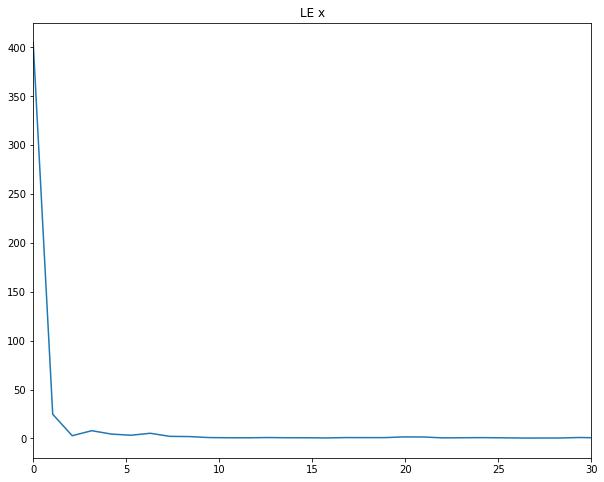

Interval: 1000 to 2000


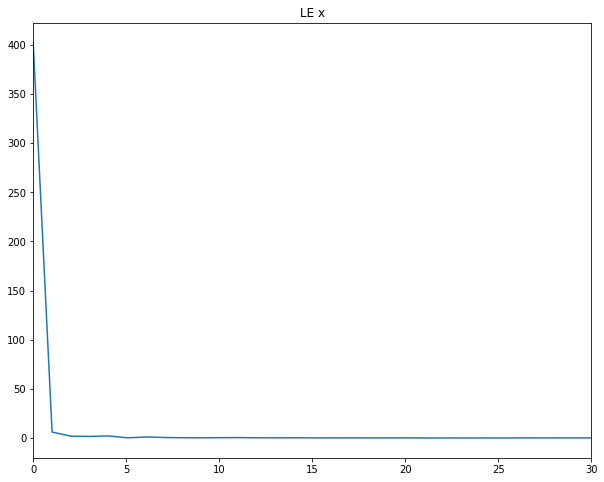

Interval: 2000 to 3000


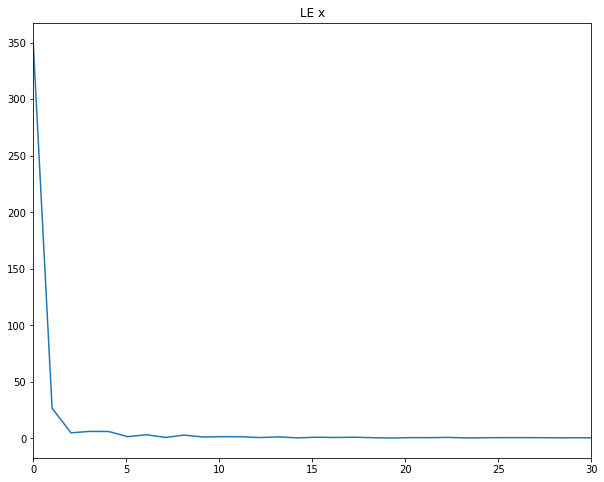

Interval: 3000 to 4000


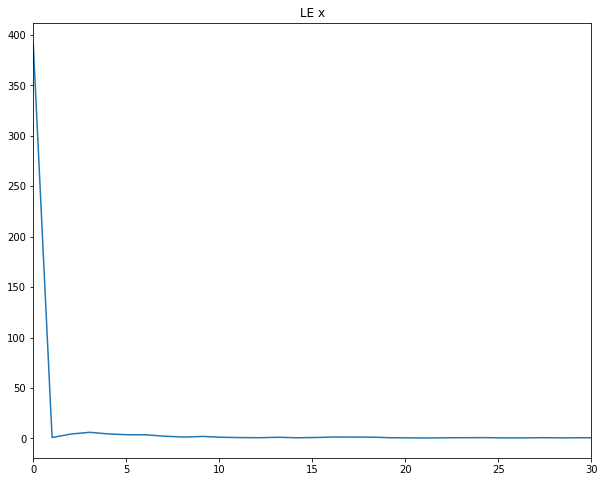

Interval: 4000 to 5000


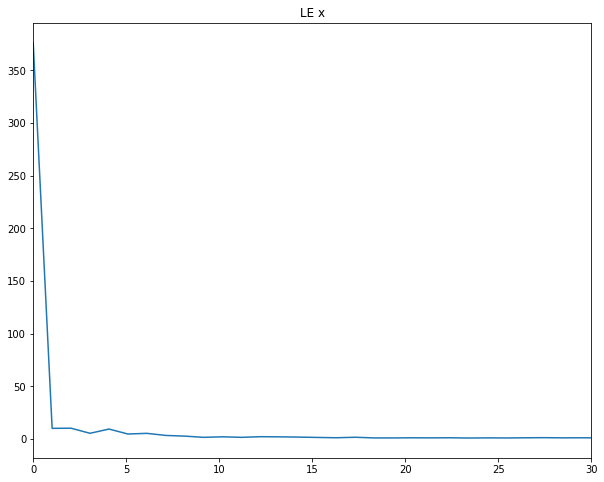

Interval: 5000 to 6000


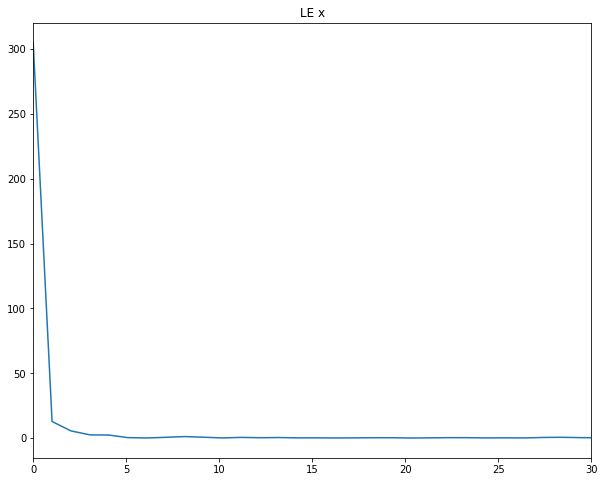

Interval: 6000 to 7000


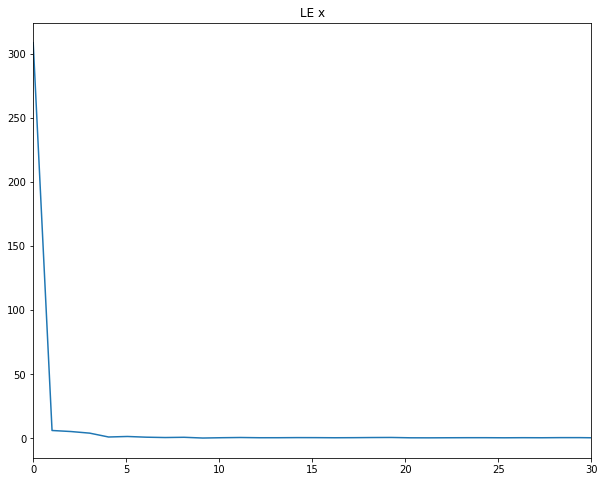

Interval: 7000 to 8000


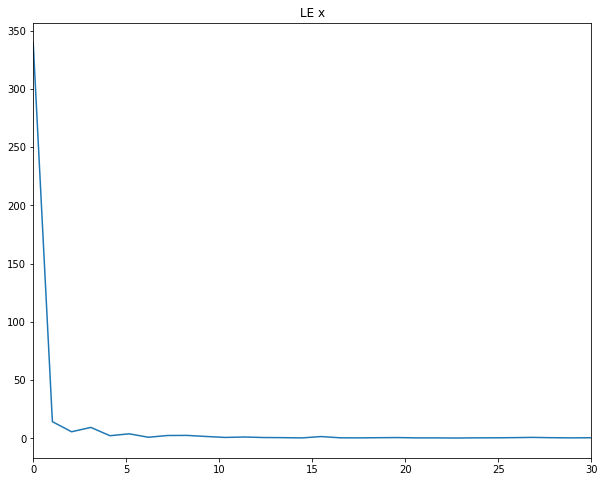

Interval: 8000 to 9000


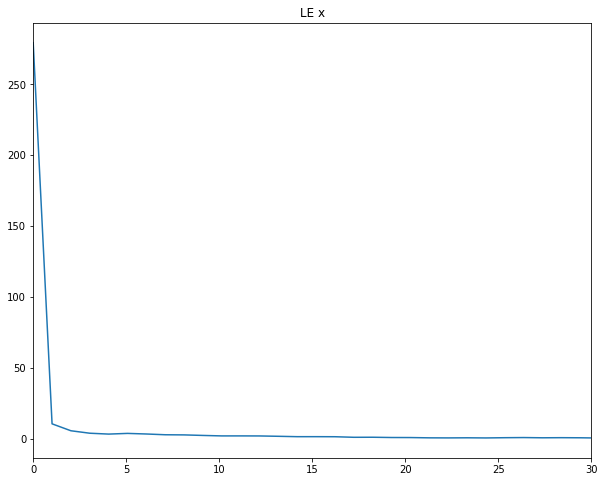

Interval: 9000 to 10000


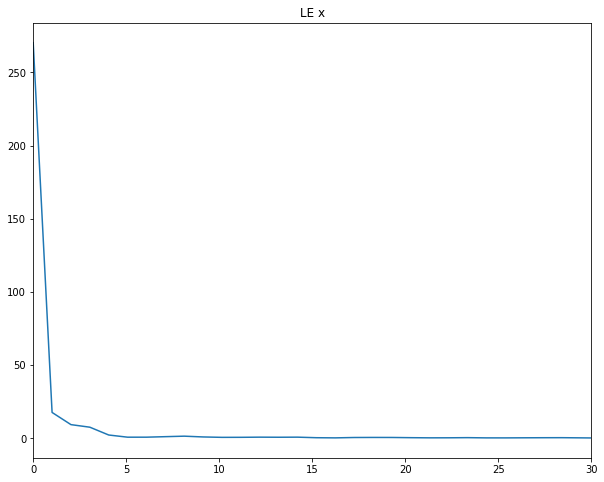

Interval: 10000 to 11000


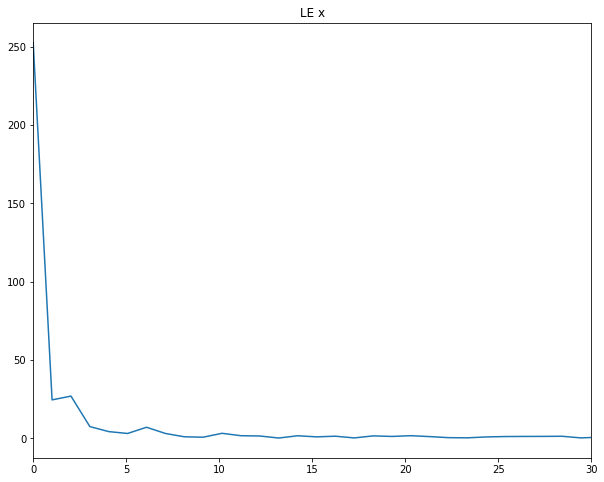

Interval: 11000 to 12000


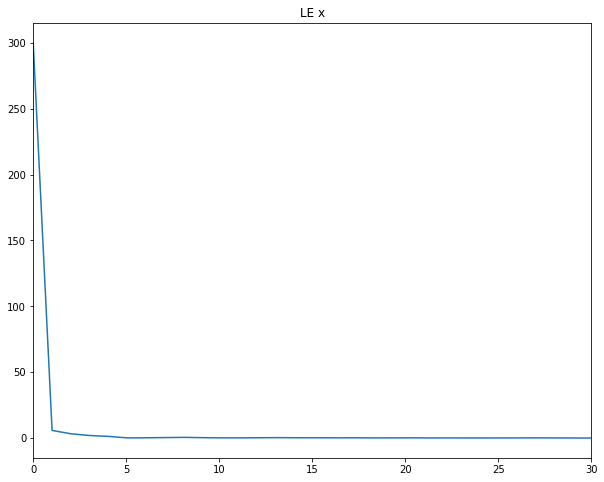

Interval: 12000 to 13000


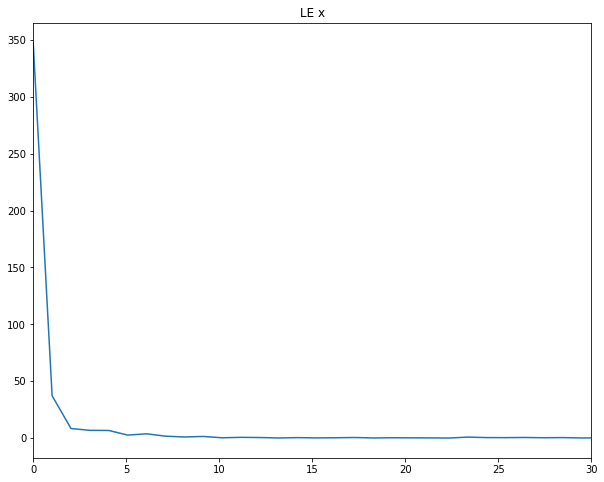

Interval: 13000 to 14000


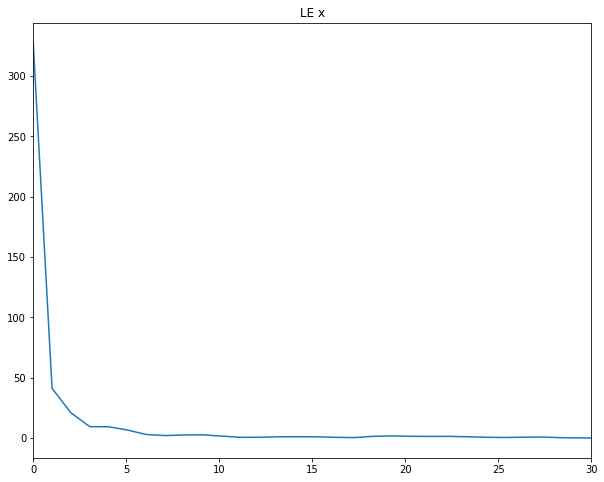

Interval: 14000 to 15000


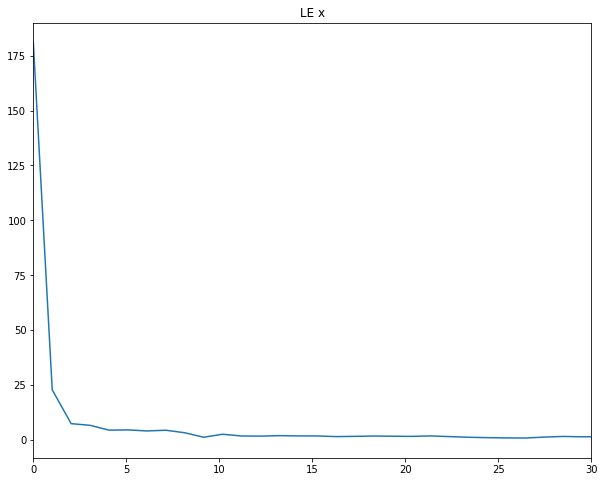

Interval: 15000 to 16000


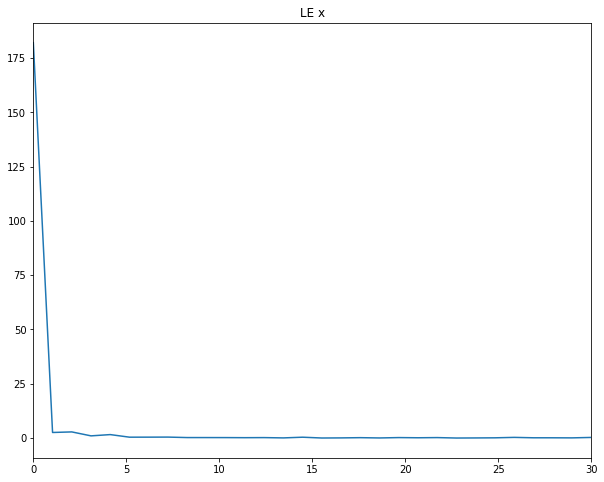

Interval: 16000 to 17000


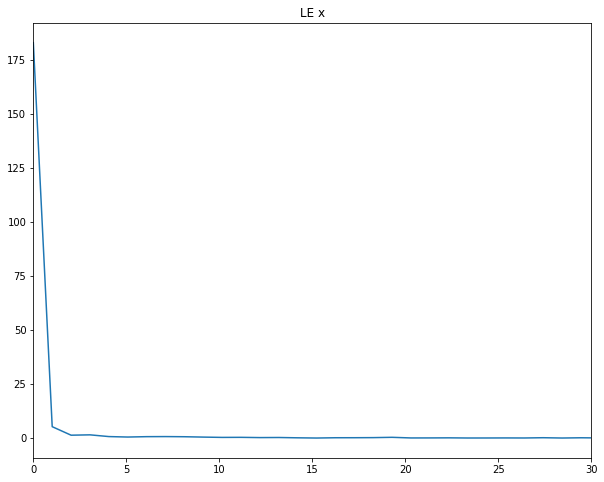

Interval: 17000 to 18000


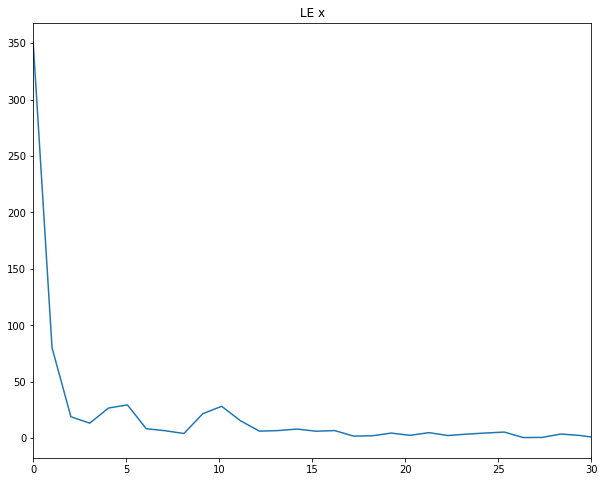

Interval: 18000 to 19000


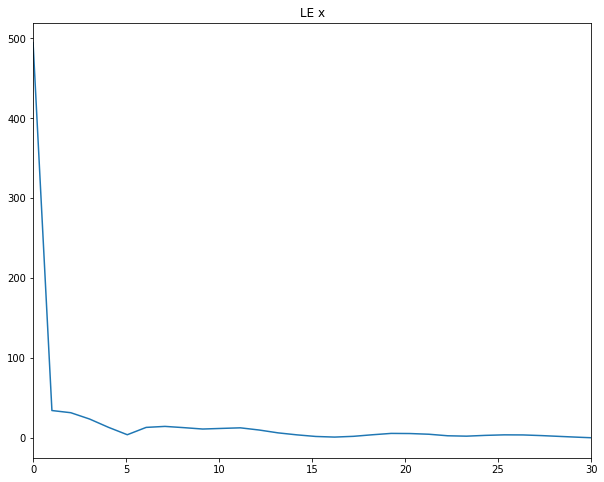

Interval: 19000 to 20000


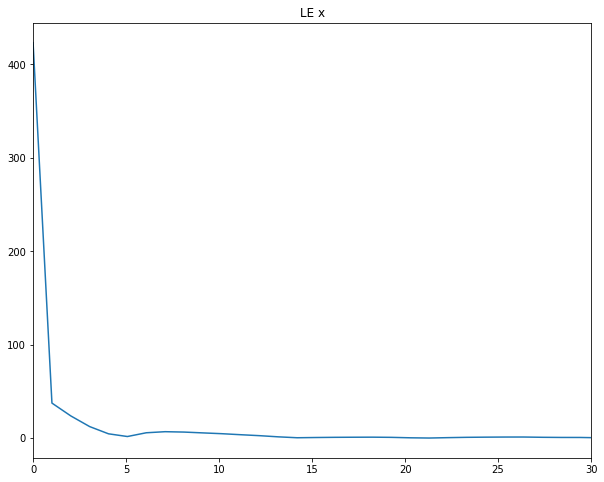

Interval: 20000 to 21000


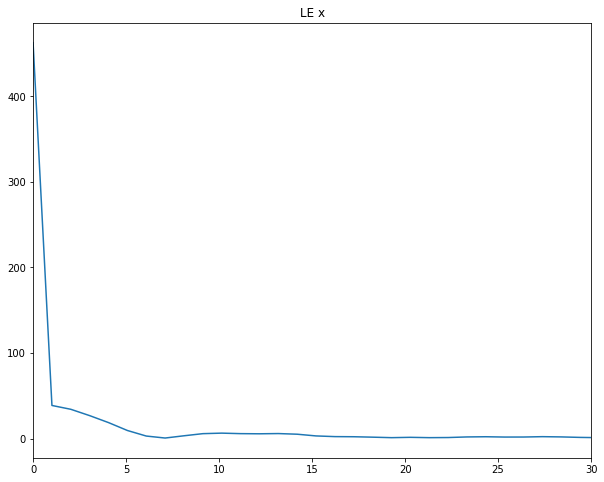

Interval: 21000 to 22000


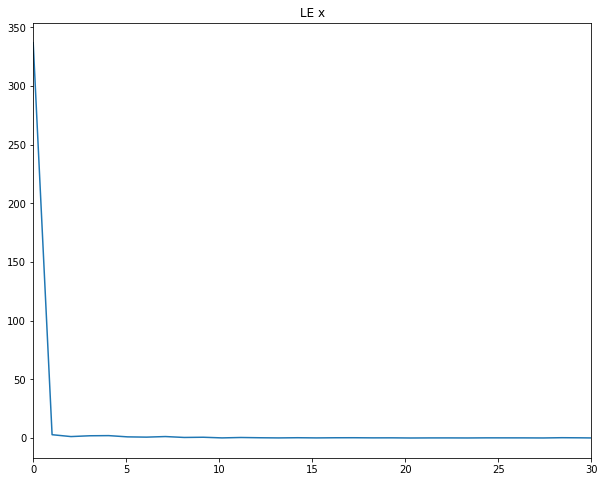

Interval: 22000 to 23000


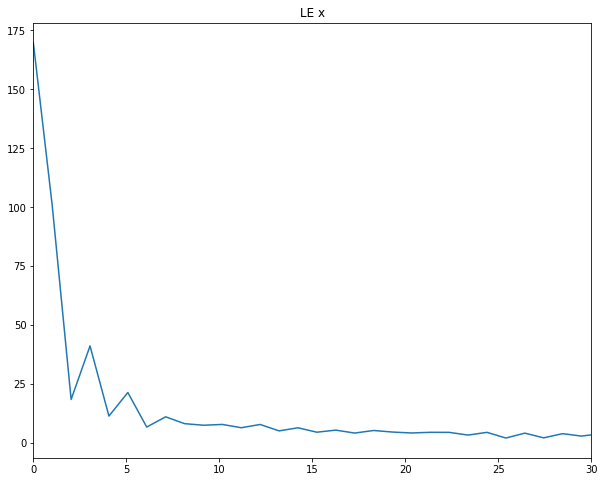

Interval: 23000 to 24000


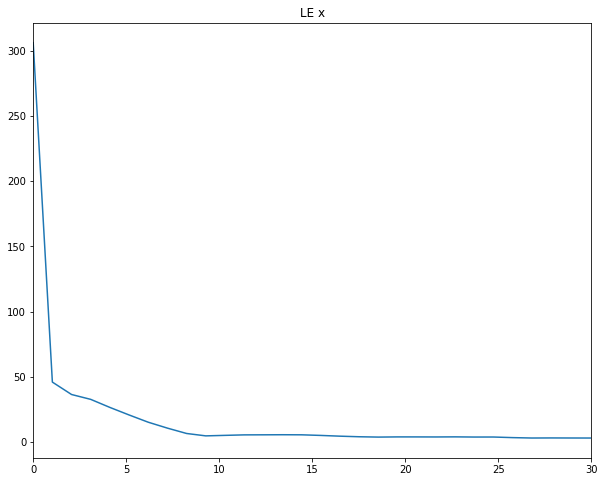

Interval: 24000 to 25000


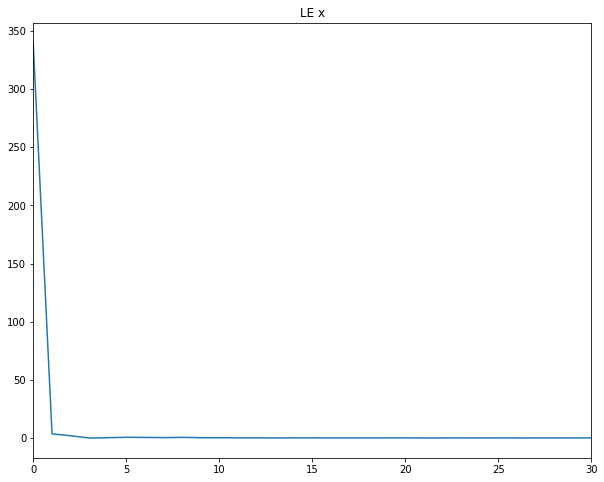

Interval: 25000 to 26000


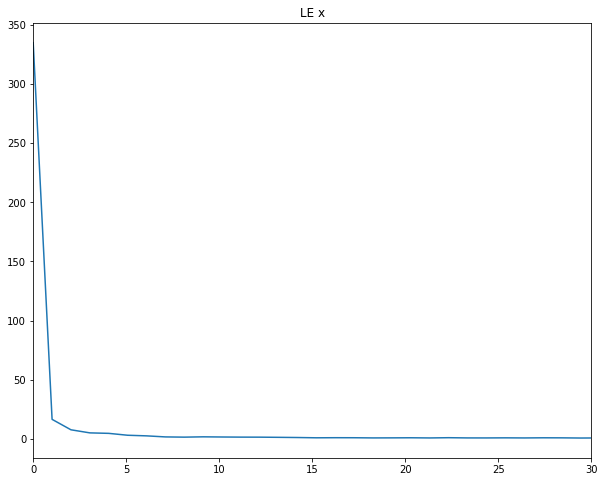

Interval: 26000 to 27000


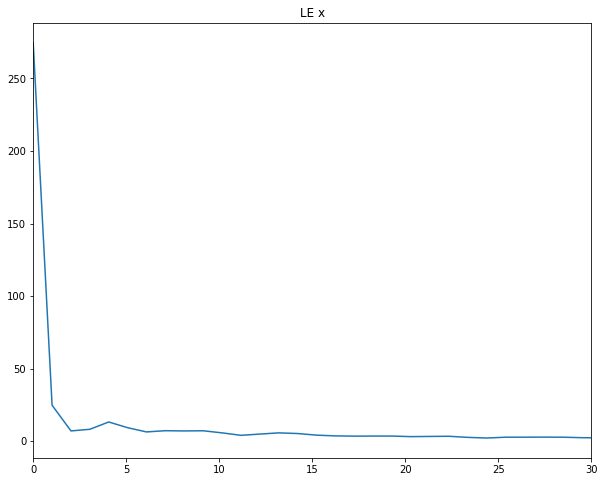

Interval: 27000 to 28000


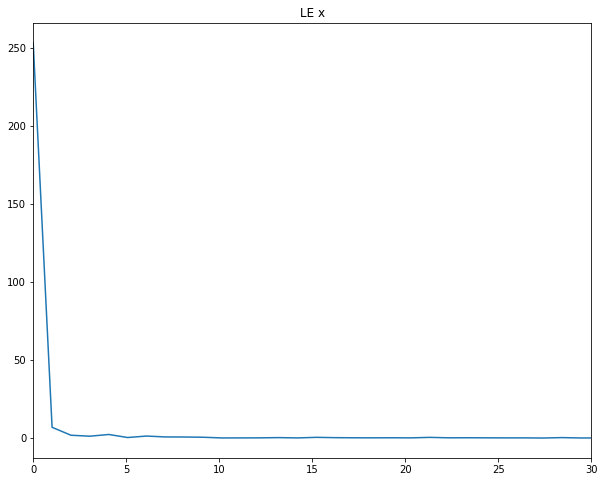

Interval: 28000 to 29000


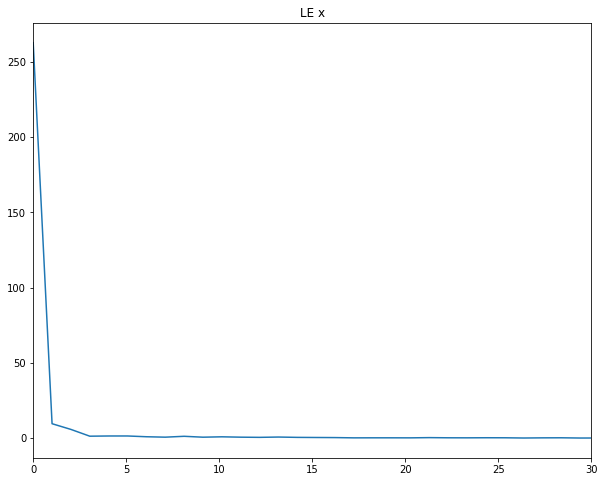

Interval: 29000 to 30000


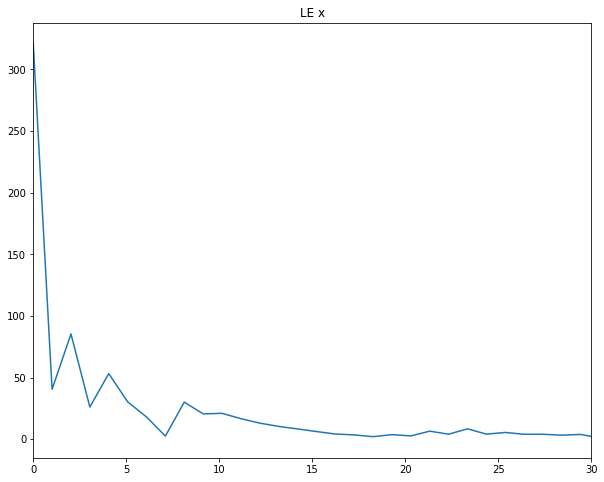

Interval: 30000 to 31000


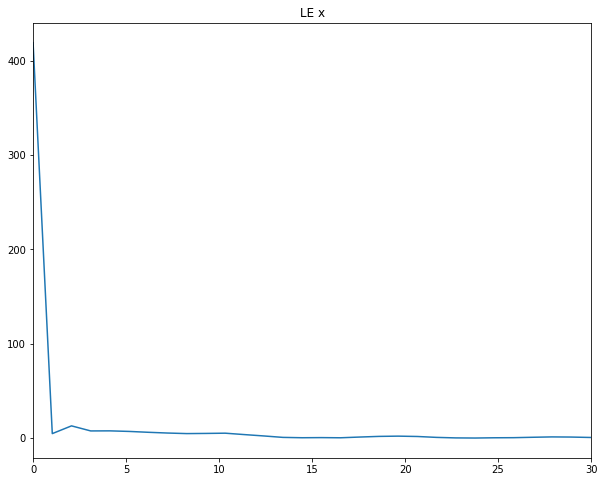

Interval: 31000 to 32000


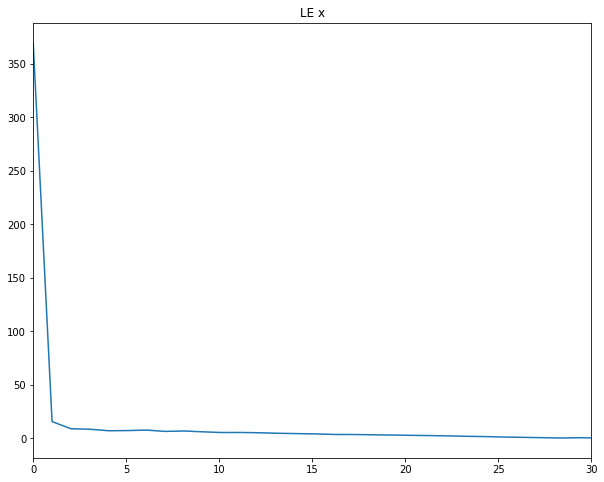

Interval: 32000 to 33000


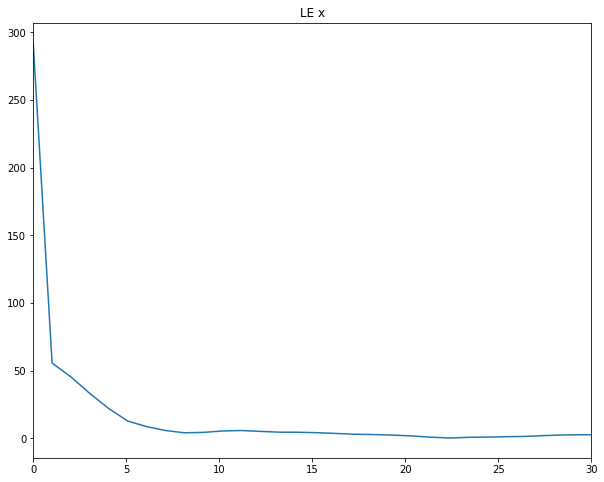

Interval: 33000 to 34000


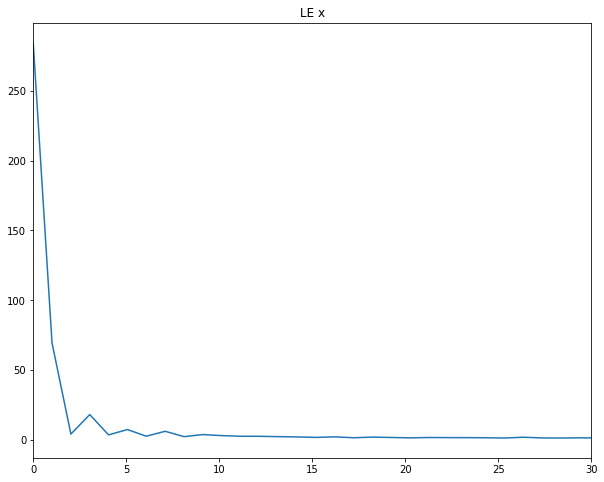

Interval: 34000 to 35000


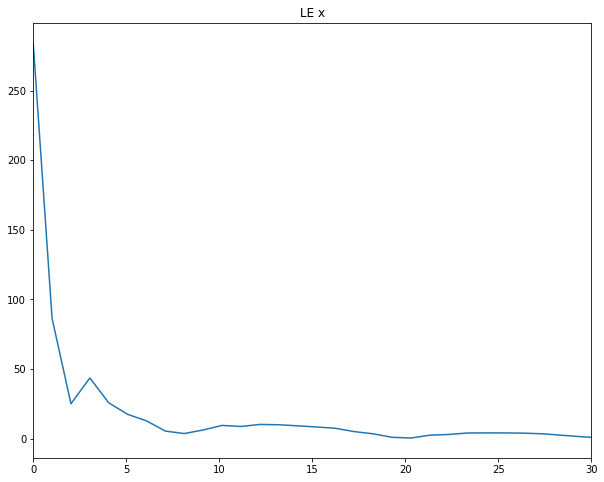

Interval: 35000 to 36000


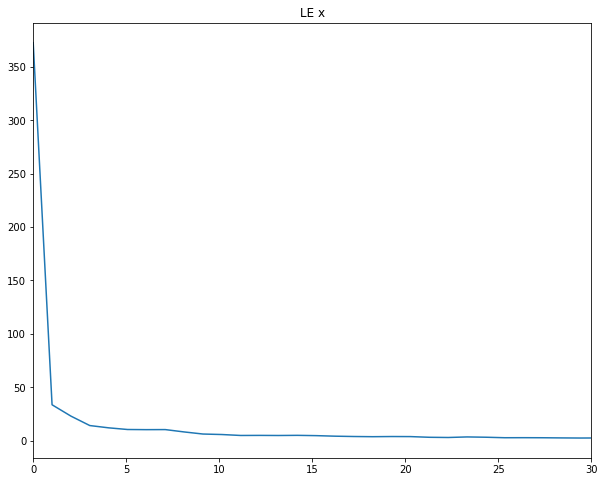

Interval: 36000 to 37000


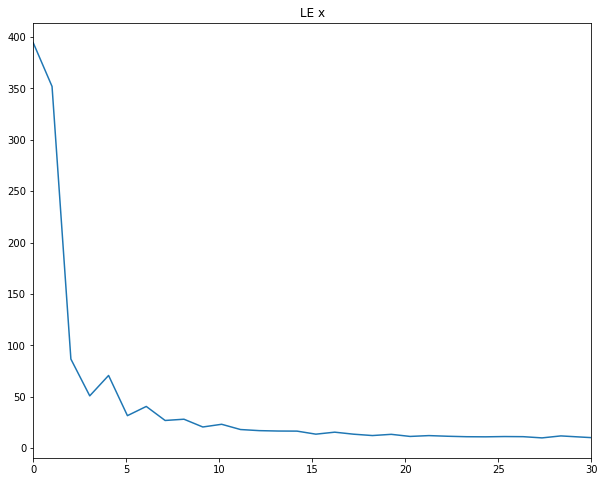

Interval: 37000 to 38000


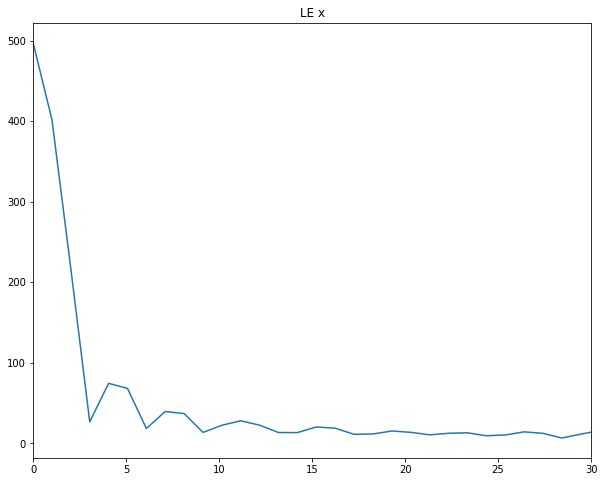

Interval: 38000 to 39000


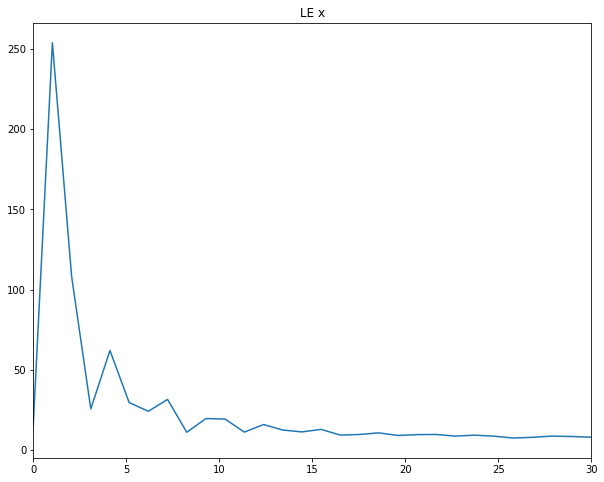

Interval: 39000 to 40000


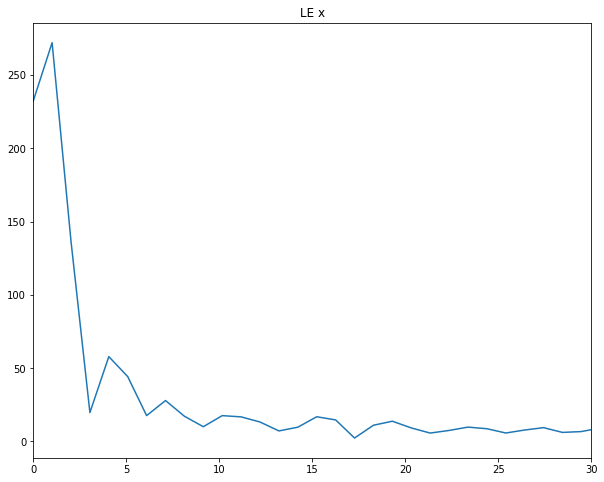

Interval: 40000 to 41000


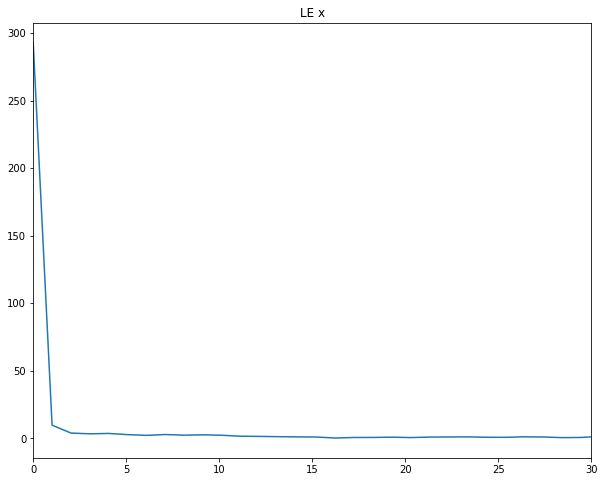

Interval: 41000 to 42000


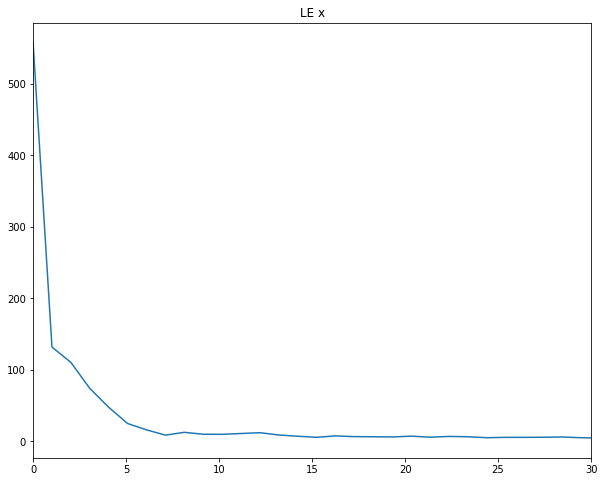

Interval: 42000 to 43000


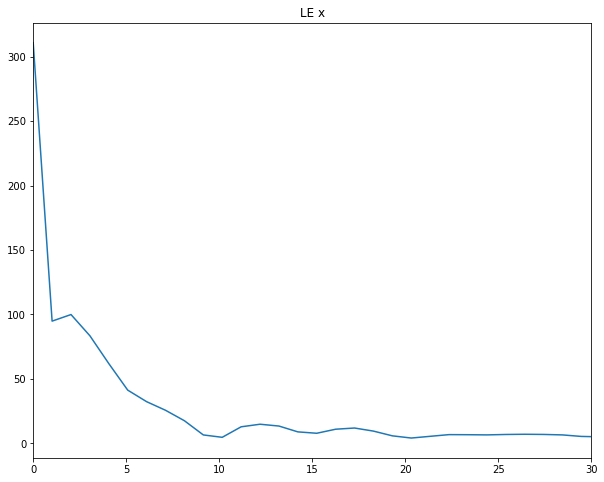

Interval: 43000 to 44000


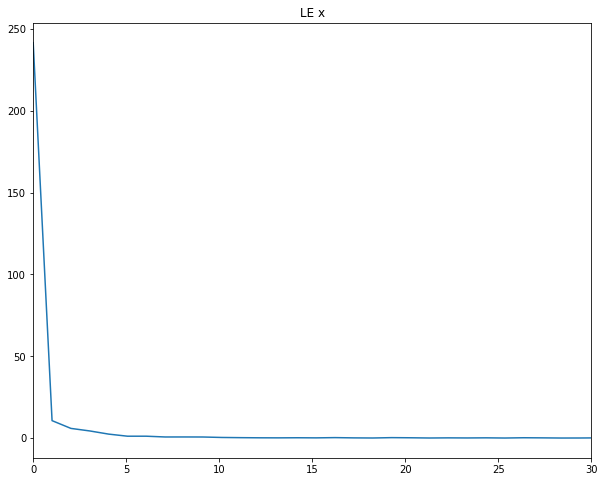

Interval: 44000 to 45000


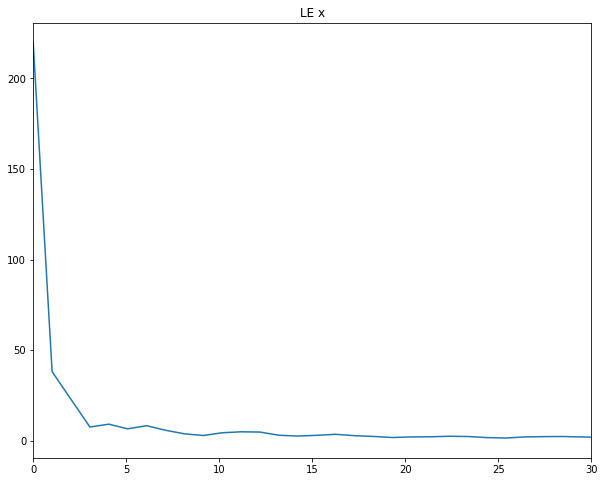

Interval: 45000 to 46000


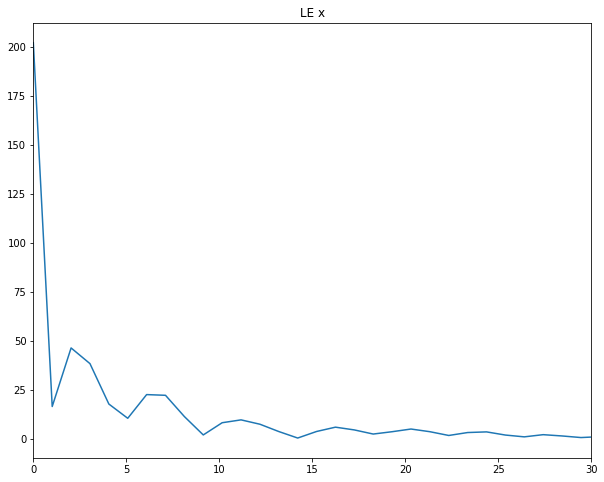

Interval: 46000 to 47000


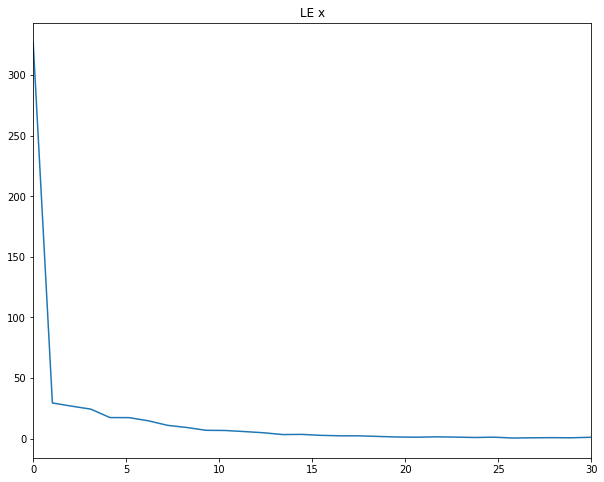

Interval: 47000 to 48000


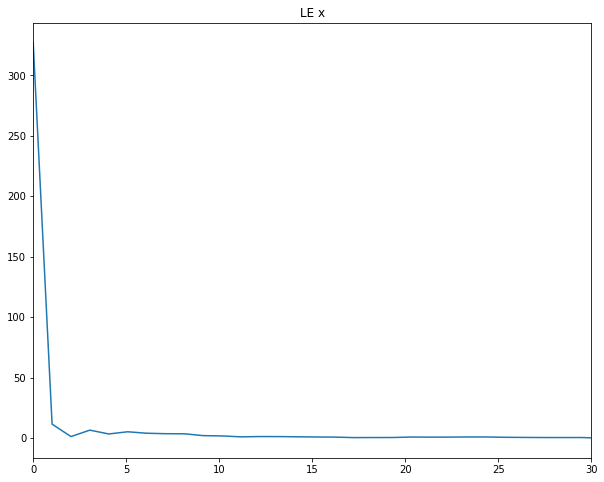

Interval: 48000 to 49000


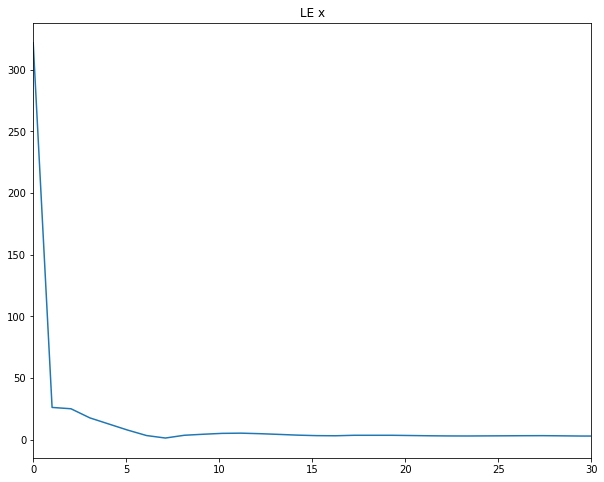

Interval: 49000 to 50000


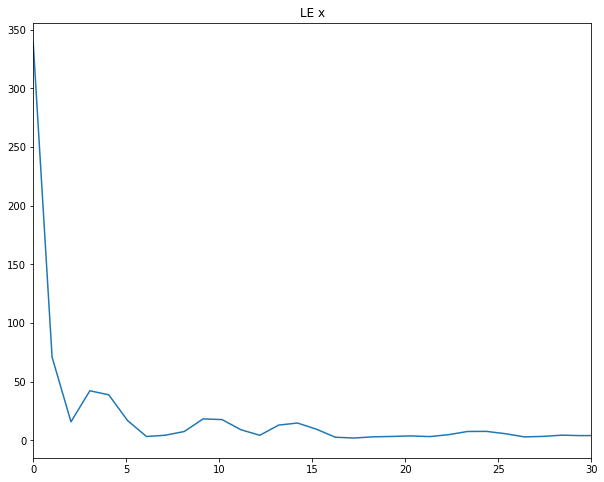

Interval: 50000 to 51000


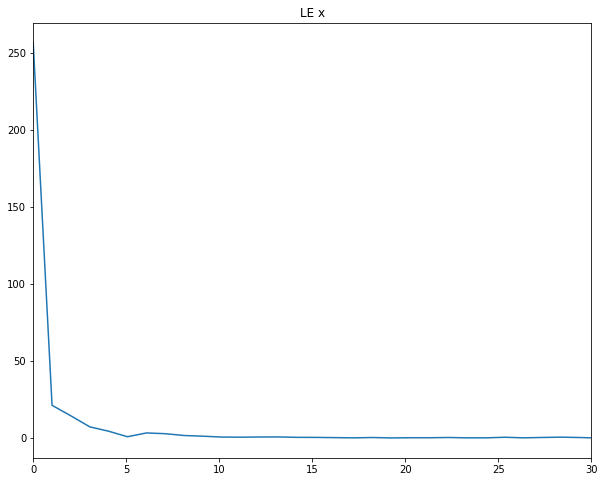

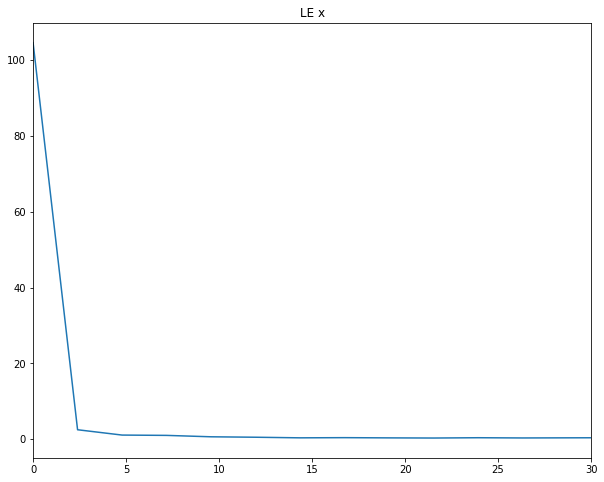

In [156]:
fourierTransformAutoInterval(dfs[0], "LE x")

#Peaks and Valleys

##Internal Functions

In [118]:
def peaksAndValleysDF(dataTitle, df, ax = None, displaygraph = False):
  """
  creates a list of all points in data where each point is equal to the points adjacent to it
  dataTitle: string
    the name of a column in data
  ax:
    the axis of a given graph
    multiple axis elements are stored as an np.ndarray

  returns:
    a list of points, where each point is equal to the points adjacent to it
  """
  pav = []
  # if ax is a list, set it to its first graph
  if type(ax) is np.ndarray:
    ax = ax[0]
  # for each point in the given column
  for n in range(1, len(df[dataTitle])-1):
    # if this point is increaseing, color it red
    if df[dataTitle][n-1] < df[dataTitle][n] and df[dataTitle][n] < df[dataTitle][n+1]:
      if displaygraph == True:
        ax.scatter(df[Milliseconds][n], df[dataTitle][n], color = 'Red')
      else:
        pass
    # if this point is decreasing, color it green
    elif df[dataTitle][n-1] > df[dataTitle][n] and df[dataTitle][n] > df[dataTitle][n+1]:
      if displaygraph == True:
        ax.scatter(df[Milliseconds][n], df[dataTitle][n], color = 'Green')
      else:
        pass
    # if this graph is neither increasing nor decreasing, append it to pav
    else:
      pav.append((df[Milliseconds][n], df[dataTitle][n]))
  # color all points in pav black
  if displaygraph == True:
    # add the graph line to the graph
    ax.plot(df[Milliseconds], df[dataTitle], zorder = 0, label = dataTitle)
    for n in pav:
      ax.scatter(n[0], n[1], color = 'Black')
    ax.legend()
    return ax
  if displaygraph == False:
    return pav

In [119]:
def createPavFrame(dataTitle, pav, df, minimumLength = 4, skipDivisor = 8):
  """
  creates a DataFrame that has all of the peaks and valleys in pav, one peak or valley for each column
  dataTitle: string
    the name of a column in the dataframe
  pav:
    the output of the pav function for the given dataTitle
  df:
    the dataframe for data to be drawn from
  minimumLength:
    the minimum amount of points for a group of points to be considered a peak or valley
  skipDivisor:
    the divisor that helps determine the minimum distance between a peak and valley
    the higher this is, the lower the minimum distance

  returns:
    a DataFrame that has all of the peaks and valleys in pav, one peak or valley for each column
  """
  pavFrame = pd.DataFrame()

  skipValue = (max(df[dataTitle])-min(df[dataTitle]))/skipDivisor
  i = 0
  tpoint = 0
  for n in range(len(pav)-1):
    index = findInDf(pav[n][0], df)
    index2 = findInDf(pav[n+1][0], df)
    if abs(df[dataTitle][index] - df[dataTitle][index2]) > skipValue or n==len(pav)-3:
      j = n+1
      ser = pd.Series(pav[i:j], name=f"Peak/Valley {str(tpoint+1).zfill(zFillValue)}")
      if len(ser) > minimumLength:
        tpoint=tpoint+1
        pavFrame = pd.concat([pavFrame, ser], axis=1)
      i = j
  
  return pavFrame

In [120]:
def pavMidpoint(column):
  """
  finds the x-value of the midpoint of a given column
  column: list
    a list of numbers

  returns:
    the x-value of the midpoint of a given column
  """
  new = tupleFixer(column)

  midPoint = np.nanmedian(new)
  #if even number of elements, takes the lower of the two middle values
  midPoint = new[new<=midPoint].max()

  return midPoint

##Peaks and Valleys Values

In [121]:
# talk about minimumLength and skipDivisor

In [122]:
def peaksAndValleysSymmetryValues(dataTitle='jawForward', df = data):
  """
  creates and displays a dictionary for the peaks and valleys of the given
  dataframe, where the key is the peak number in the format 'Peak/Valley XXX',
  and the value is a list with the x-value of where the peak or valley appears
  and the symmetry value for that peak or valley
  dataTitle:
    the column of the dataframe
  df:
    the dataframe which data will be taken from

  returns:
    none, displays dictionary of peaks and valleys and a graph that shows
    which points are increasing, which remain the same, and which ones are 
    decreasing
  """
  #creating pav AND adding the graphical dots
  pav = peaksAndValleysDF(dataTitle, df)

  #creating & populating pavFrame
  pavFrame = createPavFrame(dataTitle, pav, df)

  #creating pavdict
  pavDict = {}
  # for each peak or valley
  for n in range(1, len(pavFrame.columns)+1):
    # create a string that is 5 characters long, consisting of left zeros in empty places
    # this string will be the title of the corresponding peak or valley midpoint
    sortedN = str(n).zfill(zFillValue)
    #establish title
    titleOfPoint=f"Peak/Valley {sortedN}"
    # find the midpoint of the entries in the given column of pavFrame, converted to int
    midpointOfPavFrameColumn = int(pavMidpoint(pavFrame[titleOfPoint]))
    # finding the symmetry value that corresponds to dataTitle in data
    # then, round the symmetry value to 4 decimal places
    dataTitleSymmetryValue = symmetryValue(pavFrame[titleOfPoint], dataTitle, df)
    dataTitleSymmetryValueRounded = np.round(dataTitleSymmetryValue, 4)
    # create an entry in pavDict with a title "titleofPoint" that corresponds to (x, symmetry)
    # where x is the time value for the midpoint of given peak/valley
    # where symmetry is the symmetry value for the given peak/valley
    pavDict[titleOfPoint] = [midpointOfPavFrameColumn, dataTitleSymmetryValueRounded]
  
  return pavDict

In [123]:
def peaksAndValleysLengths(pavNumber, dataTitle, df, minimumLength = 4, skipDivisor = 8):
  pav = peaksAndValleysDF(dataTitle, df)
  pavFrame = createPavFrame(dataTitle, pav, df, minimumLength, skipDivisor)

  titleNum = str(pavNumber).zfill(zFillValue)
  title=f"Peak/Valley {titleNum}"

  pavCol = pavFrame[title].dropna()
  length = len(pavCol)-1
  beginningpoint = pavCol[0][0]
  endingpoint = pavCol[length][0]

  print(f"Length of Peak/Valley: {abs(beginningpoint-endingpoint)}")
  print(f"Starting point of Peak/Valley: {beginningpoint}")
  print(f"Ending point of Peak/Valley: {endingpoint}")

##Graphing Functions

In [124]:
def peaksAndValleysGraph(dataTitle, df, fig = None, ax = None):
  """
  visualizes on a graph which points in the given column of df are the decreasing, incrsing, or neither
  dataTitle: string
    the column to graph
  df: dataframe
    the dataframe from which to graph the column
  ax: axis
    the axis to graph on
  """
  if fig == None or ax == None:
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
  ax.plot(df[Milliseconds],df[dataTitle],zorder = -1)
  # for each point in the given column
  for n in range(1, len(df[dataTitle])-1):
    # if this point is increasing, color it red
    if df[dataTitle][n-1] < df[dataTitle][n] and df[dataTitle][n] < df[dataTitle][n+1]:
      ax.scatter(df[Milliseconds][n], df[dataTitle][n], color = 'Red')
      pass
    # if this point is decreasing, color it green
    elif df[dataTitle][n-1] > df[dataTitle][n] and df[dataTitle][n] > df[dataTitle][n+1]:
      ax.scatter(df[Milliseconds][n], df[dataTitle][n], color = 'Green')
      pass
    # if this graph is neither increasing nor decreasing, color it black
    else:
      ax.scatter(df[Milliseconds][n], df[dataTitle][n], color = 'Black')

  return fig, ax

In [125]:
def peaksAndValleysGraphSmooth(dataTitle, df, minimumLength = 4, skipDivisor = 8):
  fig, ax = plt.subplots(1, 1, figsize = (8*3, 6*3))
  ax.plot(df[Milliseconds],df[dataTitle],zorder = -1, color = 'black')

  #creating pav AND adding the graphical dots
  pav = peaksAndValleysDF(dataTitle, df)
  #creating & populating pavFrame
  pavFrame = createPavFrame(dataTitle, pav, df, minimumLength, skipDivisor)

  colorDict = ['r', 'orange', 'g', 'blue', 'purple', 'pink']
  index = 0

  groupNum = 1

  for col in pavFrame:
    pointGroup = []
    # graph the point group and color it
    for point in pavFrame[col]:
      notNan = True
      if point is np.NaN:
        notNan = False
      if notNan == True:
        ax.scatter(point[0], point[1], color=colorDict[index])
        pointGroup.append(point)
    # label the group at the midpoint
    midpoint = pointGroup[len(pointGroup)//2]
    ymin, ymax = ax.get_ylim()
    xincrease = -800
    yincrease = abs(ymax-ymin)*0.065
    plt.text(midpoint[0]+xincrease, midpoint[1]+yincrease, f"{groupNum}", fontSize = 24)
    groupNum += 1
    index+=1
    if index > len(colorDict)-1:
      index = 0

In [126]:
def peaksAndValleysSpikes(dataTitle, df, intervalNum = 10, detailedIntervals = False, minimumLength = 4, skipDivisor = 8):
  pav = peaksAndValleysDF(dataTitle, df)
  pavFrame = createPavFrame(dataTitle, pav, df, minimumLength, skipDivisor)
  pavMidpoints = []
  for col in pavFrame:
    midpoint = pavMidpoint(pavFrame[col])
    pavMidpoints.append(midpoint)

  CategoryValues = []
  for i in range(intervalNum):
    CategoryValues.append(0)

  maximumX = max(df[Milliseconds])
  deltaX = maximumX//intervalNum
  prevX = 0
  nextX = 0+deltaX

  for i in range(intervalNum):
    for x in pavMidpoints:
      if x > prevX and x <= nextX:
        CategoryValues[i]+=1
    prevX+=deltaX
    nextX+=deltaX

  # category names
  categories = []
  prevX = 0
  nextX = 0+deltaX
  if detailedIntervals == True:
    for i in range(intervalNum):
      categories.append(f"{prevX} - {nextX}")
      prevX+=deltaX
      nextX+=deltaX
  if detailedIntervals == False:
    for i in range(intervalNum):
      categories.append(f"{i}")
  # graphing values
  fig, ax = plt.subplots(1, 1, figsize = (8*1.5, 6))
  ax.bar(categories, CategoryValues)
  if detailedIntervals == True:
    plt.xticks(rotation = 15)

#Averages

##Internal Functions

In [127]:
def covertValuesToArray(dictionary = colPairs):
  propertyColumn = list(dictionary.values())
  expandedColumn = []
  for i in propertyColumn:
    for j in range(2):
      expandedColumn.append(i[j])
  return expandedColumn

In [128]:
def averageData(dataTitle=[Milliseconds]):
  """
  prints the average value of all the entries of a column for each of the given colums in data
  dataTitle: list
    a list of column names

  returns:
    none
    
  example:
    averageData([Milliseconds, 'browDown_L'])
  """
  for cols in dataTitle:
    #if bs
    if cols == my_cols[0]:
      cols = Milliseconds
      print('Error: Cannot average \'bs\'')
    print(f"{cols}: {np.average(data[cols])}")

In [129]:
def findInDf(number=0, df = data):
  while True:
    try:
      start = list(df[Milliseconds]).index(number)
      break
    except:
      number+=1

  return start

In [130]:
def averageValuesFrame(dfs = [], names = [],individualColPairs = False):
  if individualColPairs == False:
    expandedColumn = covertValuesToArray(colPairs)
    avgValueFrame = pd.DataFrame(expandedColumn, columns = ["Blendshapes"])

    for i in range(len(dfs)):
      avgValueList = []
      for j in expandedColumn:
        avgColValue = np.average(dfs[i][j])
        avgValueList.append(avgColValue)
      avgValueList = pd.Series(avgValueList)
      avgValueFrame = pd.concat([avgValueFrame, avgValueList.rename(f"{names[i]}")], axis=1)
    return avgValueFrame

  if individualColPairs == True:
    propertyColumn = list(colPairs.keys())
    avgValueFrame = pd.DataFrame(propertyColumn, columns = ["Blendshape Pairs"])

    for i in range(len(dfs)):
      avgValueList = []
      for j in propertyColumn:
        colName1 = colPairs[j][0]
        colName2 = colPairs[j][1]

        avgColValue1 = np.average(dfs[i][colName1])
        avgColValue2 = np.average(dfs[i][colName2])
        avgColValue = np.average([avgColValue1, avgColValue2])

        avgValueList.append(avgColValue)

      avgValueList = pd.Series(avgValueList)
      avgValueFrame = pd.concat([avgValueFrame, avgValueList.rename(f"{names[i]}")], axis=1)
    return avgValueFrame

##Average over an Interval

In [131]:
def averageDataInterval(dataTitle=[Milliseconds], df = data, start=0, end=3000):
  """
  prints the average of the values for each of the given columns over the given interval
  dataTitle: list
    a list of strings that are column names
  start: int
    the starting number in Milliseconds to begin averaging points at
  end: int
    the ending number in Milliseconds to begin averaging points at
  
  returns:
    none
    
  example:
    averageDataInterval([Milliseconds, 'browDown_L'], 0, 2000)
  """
  # out of bounds error checking
  if start>3008 or start<0 or end>3008 or start>=end:
    print('Error: Out of Bounds')
    return None

  # correct starting values in Milliseconds
  start = findInDf(start, df)
  end = findInDf(end, df)
  # print interval range
  print(f"Averages over the interval [{df[Milliseconds][start]}, {df[Milliseconds][end]}]:")
  # for each column calculate and print averages
  for cols in dataTitle:
    #bs column error checking
    if cols == my_cols[0]:
      cols = Milliseconds
      print('Error: Cannot average \'bs\'')
    # calculate and print average value for a given column
    averageOverInterval = np.average(df[cols][start:end])
    print(f"{cols}: {averageOverInterval}")

##Average To File (FINAL)

In [132]:
def averageValuesToFile(dfs = [], names = [], individualColPairs = False):
  """
  outputs the average values of the given dataframes to a file
  """
  avgValuesFrame = averageValuesFrame(dfs, names, individualColPairs)
  nametotal = ""
  for index in range(len(names)):
    nametotal = nametotal + names[index] + "-"
  avgValuesFrame.to_csv(f"{outputPath}/{nametotal}Average Values.csv")

#Symmetry Analysis

##Internal Functions

In [133]:
zFillValue = 5

In [134]:
def tupleFixer(column):
  """
  creates an array with one-element entries
  column: list
    a list of numbers
  ax:
    the axis of a given graph
    multiple axis elements are stored as an np.ndarray

  returns:
    an array that is the same as the input column, but replaces all tuples with only their x-value
  """
  new = []
  for x in column:
    if x is np.nan:
      new.append(x)
    else:
      new.append(x[0])
  new = np.array(new)
  return new

In [135]:
def symmetryValue(column, dataTitle, df = data, checkRange=10) :
  """
  assigns a value to quantify the symmetry of a given dataTitle
  column:
    a column in a given pavFrame
  dataTitle: string
    the name of a column in the dataframe
  checkRange:
    the amount of points to the left and right that the function should search
  df:
    the dataframe for data to be drawn from

  returns:
    returns a value to quantify the symmetry of a given dataTitle
  """
  midPointX = pavMidpoint(column)
  midPointIndex = findInDf(midPointX, df)
  midPointY = df[dataTitle][midPointIndex]

  symmetryRange = df[dataTitle][midPointIndex-checkRange-1:midPointIndex+checkRange+2]

  rightSideInc = None
  leftSideInc = None
  n = 1

  while (rightSideInc == None or leftSideInc == None) and n<=checkRange+1:
    if symmetryRange[midPointIndex] < symmetryRange[midPointIndex+n]:
      rightSideInc = "Increasing"
    elif symmetryRange[midPointIndex] > symmetryRange[midPointIndex+n]:
      rightSideInc = "Decreasing"
    elif symmetryRange[midPointIndex] == symmetryRange[midPointIndex+n]:
      rightSideInc = None
    if symmetryRange[midPointIndex] < symmetryRange[midPointIndex-n]:
      leftSideInc = "Increasing"
    elif symmetryRange[midPointIndex] > symmetryRange[midPointIndex-n]:
      leftSideInc = "Decreasing"
    elif symmetryRange[midPointIndex] == symmetryRange[midPointIndex-n]:
      leftSideInc = None
    n+=1

  for n in range(2, checkRange):
    if symmetryRange[midPointIndex+n-1] < symmetryRange[midPointIndex+n]:
      currentChange = "Increasing"
    elif symmetryRange[midPointIndex+n-1] > symmetryRange[midPointIndex+n]:
      currentChange = "Decreasing"
    elif symmetryRange[midPointIndex+n-1] == symmetryRange[midPointIndex+n]:
      currentChange = rightSideInc
    if currentChange != rightSideInc:
      checkRange = n-1
      break
    if symmetryRange[midPointIndex-n+1] < symmetryRange[midPointIndex-n]:
      currentChange = "Increasing"
    elif symmetryRange[midPointIndex-n+1] > symmetryRange[midPointIndex-n]:
      currentChange = "Decreasing"
    elif symmetryRange[midPointIndex-n+1] == symmetryRange[midPointIndex-n]:
      currentChange = leftSideInc
    if currentChange != leftSideInc and n-1 <= checkRange:
      checkRange = n-1
      break

  symmetryRangeNew = df[dataTitle][midPointIndex-checkRange:midPointIndex+checkRange+1]

  symmetryNumbers = []
  for n in range(1,checkRange+1):
    x = abs(symmetryRangeNew[midPointIndex]-symmetryRangeNew[midPointIndex-n])
    symmetryNumbers.append(x)
    x = abs(symmetryRangeNew[midPointIndex+n]-symmetryRangeNew[midPointIndex])
    symmetryNumbers.append(x)
  return np.mean(symmetryNumbers)

In [136]:
def symmetryValuesPosition(dataTitle, df = data):
  tempSymmetryValues = []
  for i, j in zip(df[dataTitle[0]], df[dataTitle[1]]):
    if i+j==0:
      tempSymmetryValues.append(0)
    else:
      tempSymmetryValues.append(np.round(abs((j-i)/((i+j)/2)), 4))
  return np.mean(tempSymmetryValues)

#Symmetry Comparison

##Internal Functions

In [137]:
def getSymmetryValue(y1, y2):
  tempSymmetryValues = []
  for i, j in zip(y1, y2):
    if i+j==0:
      tempSymmetryValues.append(0)
    else:
      difference = abs((j-i))
      tempSymmetryValues.append(difference)
  averageSymmetryValue = np.mean(tempSymmetryValues)
  return np.round(averageSymmetryValue, 4)

In [138]:
def skinnyGraphSizes(dfs = []): 
  totalRows = len(colPairs.keys())
  totalColumns = len(dfs)
  figsize=(8*totalColumns, 6*totalRows)
  return totalRows, totalColumns, figsize

In [139]:
def squareGraphSizes(dfs = []):
  totalGraphsNum = len(dfs)*len(colPairs.keys())
  totalRows = math.floor(math.sqrt(totalGraphsNum))
  totalColumns = math.ceil(totalGraphsNum/totalRows)
  while totalColumns % len(dfs) != 0:
      totalColumns+=1
  figsize=(8*totalColumns, 6*totalRows)
  return totalRows, totalColumns, figsize

In [140]:
def graphColPair(dfs = [], titles = [],keys = [], ax = "Placeholder", totalRows = 5):
  row = 0
  column = 0

  for key in keys:
    for i in range(len(dfs)):
      colTitles = colPairs[key]
      x1=dfs[i][Milliseconds]
      y11=dfs[i][colTitles[0]]
      y12=dfs[i][colTitles[1]]

      ax[row, column+i].plot(x1,y11, label=colTitles[0])
      ax[row, column+i].plot(x1,y12, label=colTitles[1])
      ax[row, column+i].set_title(f'{titles[i]}')
      ax[row, column+i].legend()
    row+=1
    if row%totalRows==0:
      row = 0
      column+=len(dfs)

##Compare Symmetry Graph Functions
Functions that display graphs of columns of the data sets for comparison

In [141]:
def compareSymmetryGraphs(dfs = [], titles = [], skinnyGraph = True, scaled = False):
  if skinnyGraph == True:
    totalRows, totalColumns, figsize = skinnyGraphSizes(dfs)
  else:
    totalRows, totalColumns, figsize = squareGraphSizes(dfs)

  fig, ax = plt.subplots(totalRows, totalColumns, figsize = figsize)
  
  if scaled == True:
    plt.setp(ax, ylim = (0, 1))

  graphColPair(dfs, titles, colPairs.keys(), ax, totalRows)
  display(fig)
  return fig

## Symmetry Values Functions
Functions that the symmetry values for comparison between two parts of a colPair

In [142]:
def symmetryValues(dfs = [], names = []):
  propertyColumn = list(colPairs.keys())
  symmValueFrame = pd.DataFrame(propertyColumn, columns = ["Blendshapes"])

  for i in range(len(dfs)):
    symmValueList = []
    for key in colPairs.keys():
      col1 = dfs[i][colPairs[key][0]]
      col2 = dfs[i][colPairs[key][1]]
      symmValue = getSymmetryValue(col1, col2)
      symmValueList.append(symmValue)
    symmValueList = pd.Series(symmValueList)
    symmValueFrame = pd.concat([symmValueFrame, symmValueList.rename(f"{names[i]}")], axis=1)
  return symmValueFrame

##ToFile Functions (FINAL)
Functions that create an output file for graphs

In [143]:
def compareSymmetryGraphsToFile(dfs = [], names = [], skinnyGraph = True, scaled = False):
  fig = compareSymmetryGraphs(dfs, names, skinnyGraph, scaled)
  nametotal = ""
  for index in range(len(names)):
    nametotal = nametotal + names[index] + "-"
  saveGraph(fig, f"{nametotal}Symmetry Graph")

In [144]:
def symmetryValuesToFile(dfs = [], names = []):
  symmValueFrame = symmetryValues(dfs, names)
  nametotal = ""
  for index in range(len(names)):
    nametotal = nametotal + names[index] + "-"
  symmValueFrame.to_csv(f"{outputPath}/{nametotal}Symmetry Values.csv")

#Eye Blink Counting

##Count Blinks & Blinks per Second (FINAL)

In [145]:
def CountBlinks(df = data, tolerance = 0.1, middlePointMax = 10, name = ""):
  """
  counts the amount of blinks in the given dataframe
  does this my counting the amount of times that there is a low point followed by a high point
  a low point is any point that is lower than "tolerance" of the midpoint
  a high point is any point that is higher than "tolerance" of the midpoint
  ex. if the average y value is 0.4:
      any point with a y value lower than 0.2 would be a low point
      any point with a y value higher than 0.6 would be a high point
  if there are more than "midpoint" points within "tolerance" of the middle
  the dataset must be manually reviewed, as the blink number would be innacurate

  returns:
  The amount of blinks and blinks per second for the given dataframe
  """
  middlePoints = 0
  pav_L = peaksAndValleysDF("eyeBlink_L", df)
  pav_R = peaksAndValleysDF("eyeBlink_R", df)
  pav = [pav_L, pav_R]

  if name != "":
    name+=": "

  for i in range(len(pav)):
    highestPav = max(pav[i], key=itemgetter(1))[1]
    lowestPav = min(pav[i], key=itemgetter(1))[1]

    mediumvalue = (highestPav+lowestPav)/2
    lowbound = mediumvalue-tolerance
    highbound = mediumvalue+tolerance

    for j in pav[i]:
      if j[1] > lowbound and j[1] < highbound:
        middlePoints+=1
    if middlePoints>=middlePointMax:
      if i == 0:
        LorR = "L"
      if i == 1:
        LorR = "R"
      print(f"{name}Please review eyeBlink_{LorR} Manually")
    else:
      blinks = 0
      seconds = max(df[Milliseconds])/1000

      point0 = 0
      point1 = 1
      for y in pav[i][:-1]:
        y1 = pav[i][point0][1]
        y2 = pav[i][point1][1]
        if y1 < lowbound and y2 > highbound:
          blinks+=1
        point0+=1
        point1+=1

      bps = blinks/seconds
      if i == 0:
        LorR = "L"
      if i == 1:
        LorR = "R"
      print(f"{name}eyeBlink_{LorR} has {blinks} blinks, for a total of {bps} blinks per second.")
  # return mediumvalue

In [146]:
def showBlinkGraphs(df = data):
  """
  Graphs the eyeBlink blendshapes for the given dataframe.
  If the point has a positive slope, it is red
  If the point has a negative slope, it is green
  Otherwise, it is black
  df: dataframe
    the dataframe of which to graph the blink blendshapes
  """
  fig, ax = plt.subplots(2, 1, figsize = (8, 12))
  peaksAndValleysGraph("eyeBlink_L", df, fig, ax[0])
  peaksAndValleysGraph("eyeBlink_R", df, fig, ax[1])

##Blink Graphs To File (FINAL)


In [147]:
def BlinkGraphsToFile(dfs = [], names = []):
  """
  Graphs the eyeBlink blendshapes for the given dataframes and returns them in a file
  If the point has a positive slope, it is red
  If the point has a negative slope, it is green
  Otherwise, it is black
  df: dataframe
    the dataframe of which to graph the blink blendshapes
  """
  for i in range(len(dfs)):
    fig, ax = plt.subplots(2, 1, figsize = (8, 12))
    peaksAndValleysGraph("eyeBlink_L", dfs[i], fig, ax[0])
    ax[0].set_title("eyeBlink_L")
    peaksAndValleysGraph("eyeBlink_R", dfs[i], fig, ax[1])
    ax[1].set_title("eyeBlink_R")
    saveGraph(fig, f"{names[i]} Blink Graphs")

#Difference Functions

##General Difference Functions

In [148]:
def difference(df1, colTitle1, colTitle2):
  totalgraphs = 3
  y1 = df1[colTitle1]
  y2 = df1[colTitle2]
  y3 = y1-y2
  fig, ax = plt.subplots(totalgraphs, 1, figsize = (8, 6*totalgraphs))
  ax[0].plot(df1[Milliseconds],y1, label = f"{colTitle1}")
  ax[1].plot(df1[Milliseconds],y2, label = f"{colTitle2}")
  ax[2].plot(df1[Milliseconds],y3, label = f"Difference between {colTitle1} and {colTitle2}")
  for i in range (0,2):
    ax[i].legend()
  return fig

In [149]:
def differenceToFile(df1, colTitle1, colTitle2):
  fig = difference(df1, colTitle1, colTitle2)
  saveGraph(fig, f"Difference between {colTitle1} and {colTitle2}")

##Eye Difference Functions

In [150]:
def eyeDifference(dfs=[], names=[], scaledDifference = False):
  """
  outputs graphs of the Left Eye and Right Eye x- and y- eulerAngles
  dfs: list
    the dataframes for data to be drawn from
  scaledDifference: boolean
    whether or not the y bounds will be the same for both graphs

  returns: graphs of the Left Eye and Right Eye x- and y- eulerAngles
  """
  fig, ax = plt.subplots(3, 2*len(dfs), figsize = (8*2*len(dfs), 6*3))

  for q in range(len(dfs)):
    for i in range(0+2*q,2+2*q):
      if i == 0:
        colTitle1 = "LE x"
        colTitle2 = "RE x"
      if i == 1:
        colTitle1 = "LE y"
        colTitle2 = "RE y"

      y1 = dfs[q][colTitle1]
      y2 = dfs[q][colTitle2]
      y3 = y1-y2
      ax[0,i].plot(dfs[q][Milliseconds],y1, label = f"{colTitle1}")
      ax[1,i].plot(dfs[q][Milliseconds],y2, label = f"{colTitle2}")
      ax[2,i].plot(dfs[q][Milliseconds],y3, label = f"{colTitle1} - {colTitle2}")
      for j in range(0,3):
        if j == 0 or j == 1:
          ax[j,i].set_ylim(-30, 30)
        ax[j,i].legend()
        ax[j,i].set_title(names[q])

    if scaledDifference == True:
      ymin0, ymax0 = ax[2,0].get_ylim()
      ymin1, ymax1 = ax[2,1].get_ylim()
      if ymin1 < ymin0:
        ymin = ymin1
      if ymin1 > ymin0:
        ymin = ymin0
      if ymax1 < ymax0:
        ymax = ymax0
      if ymax1 > ymax0:
        ymax = ymax1
      ax[2,0].set_ylim(ymin, ymax)
      ax[2,1].set_ylim(ymin, ymax)
  return fig

In [151]:
def eyeDifferenceToFile(dfs = [], names = [], scaledDifference = False):
  fig = eyeDifference(dfs, names, scaledDifference)
  nametotal = ""
  for index in range(len(names)):
    nametotal = nametotal + names[index] + "-"
  saveGraph(fig, f"{nametotal}LE-RE Difference")

#End Function (FINAL)

In [152]:
def outputAllDataAnalysis(dfs = [], names = [], skinnyGraph = True, scaled = True, individualColPairs = False, scaledDifference = False):
  symmetryValuesToFile(dfs, names)
  averageValuesToFile(dfs, names, individualColPairs)
  graphAllToFile(dfs, names, True, False)
  eyeDifferenceToFile(dfs, names, scaledDifference)
  BlinkGraphsToFile(dfs, names)
  if len(dfs) > 1:
    compareSymmetryGraphsToFile(dfs, names, skinnyGraph, scaled)

#Running Functions

What each function does, basically

For specific information, refer to the specific function in the Table of Context

In [153]:
# if you want to zoom in on a graph, you can enable or disable zooming by
# uncommenting one of the lines below and running this cell
# Enable Zoom:
# mpld3.enable_notebook()
# Disable Zoom:
# mpld3.disable_notebook()

In [ ]:
outputAllDataAnalysis(dfs, dfsNames, True, False, False)